In [1]:
import scanpy as sc
import scrnatools as rna
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

Global seed set to 0


In [2]:
sc.set_figure_params(figsize=(4,4), dpi=150, dpi_save=300, facecolor="white", frameon=False)
plt.rcParams["axes.grid"] = False
rna.configs.verbosity = "info"

# Data paths

## demeter

In [3]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

## gardner-lab-computer

In [4]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

# Import data

In [5]:
adata = sc.read(f"{processedDataPath}/human_ILC2/h5ad_files/human_merged_ILC_subset_3000_HVG.h5ad")

In [6]:
adata = rna.tl.log_density_ratio(
    adata,
    group_by="compartment", # The column in adata.obs containing condition/control labels
    groups=["LP", "MS"], # The condition/control labels in adata.obs[group_by] to use
    latent_rep="X_umap", # The latent representation to calculate density over
    key_added="MS/LP_log_density_ratio", # The column to add to adta.obs with the differential density ratio
)

2023-02-22 17:16:07 - log_density_ratio - INFO: Calculating log density ratio of MS/LP


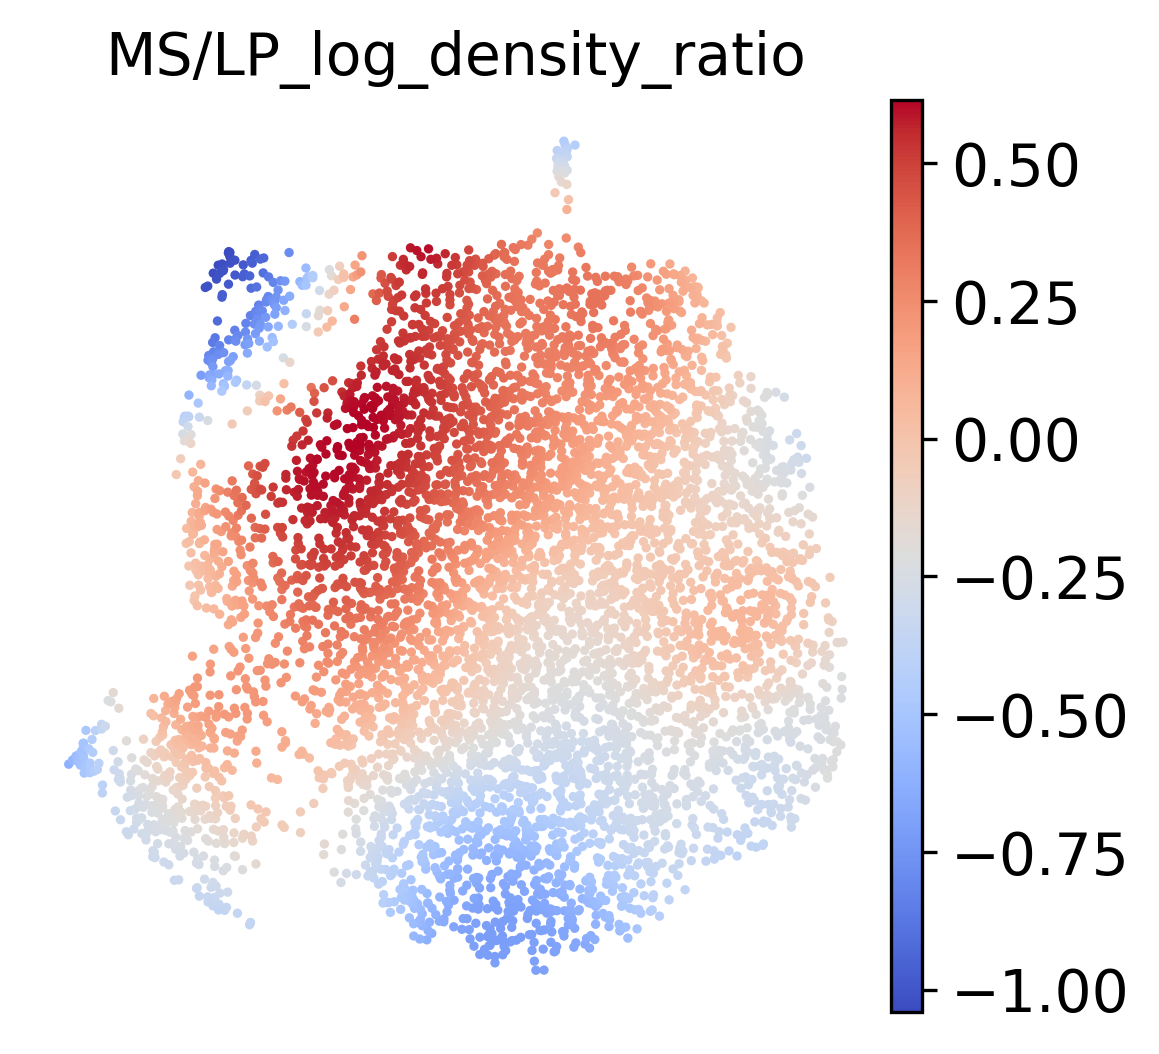

In [7]:
sc.settings.figdir = "../analysis"
sc.pl.umap(
    adata,
    color="MS/LP_log_density_ratio",
    cmap="coolwarm",
    save="_MS_LP_log_density_ratio.pdf"
)

In [8]:
adata.write(f"{processedDataPath}/human_ILC2/h5ad_files/human_merged_ILC_subset_3000_HVG.h5ad")